In [1]:
%reload_ext autoreload
%autoreload 2

# <div align='center'> 竞赛平台RestAPI </div>

In [5]:
import os
import PIL.Image as Image
import base64
import io
import json
import requests
from urllib.parse import urlencode
from k12libs.utils.nb_easy import k12ai_get_top_dir, RACEURL

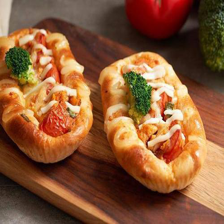

In [228]:
test_pic = os.path.join(k12ai_get_top_dir(), 'assets/images', 'garbage_bread.jpeg')
img = Image.open(test_pic)
img.resize((224, 224))

## /raceai/framework/fit

TODO

## /raceai/framework/test

In [239]:
with open(test_pic, 'rb') as fr:
    b4data = base64.b64encode(fr.read()).decode()
    
userid = "15801310416"
projectid = "100001"
dataset = "rgarbage"
model = "Resnet18"

reqdata = {
    "task": "cls.test",
    "cfg": {
        "runner": {
            "device": 'cuda'
        },
        "general": {
            "work_dir": f'/raceai/data/users/{userid}/{projectid}'
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",  
            "params": {
                "data_name": dataset,
                "data_source": b4data,
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageDataset",
                    "params": {
                        "input_size": 224,
                        "mean": [0.6535,0.6132,0.5643],
                        "std": [0.2165,0.2244,0.2416]
                    }
                }
            }
        },
        "model": {
            "class_name": f"raceai.models.backbone.{model}",  
            "params": {
                "num_classes": 4,
                "weights": f"/raceai/data/ckpts/{dataset}_{model}.pth"
            }
        }
    }
}

uri = f'{RACEURL}/raceai/framework/test'

resdata = json.loads(requests.post(url=uri, json=reqdata).text)
resdata

{'errno': 0, 'result': [1]}

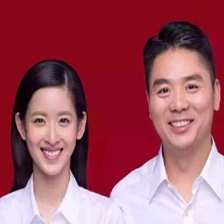

In [63]:
test_pic = os.path.join(k12ai_get_top_dir(), 'assets', 'test_face_det.jpg')
img = Image.open(test_pic)
img.resize((224, 224))

In [241]:
with open(test_pic, 'rb') as fr:
    b4data = base64.b64encode(fr.read()).decode()
    
userid = "15801310416"
projectid = "100001"
dataset = "faces"
model = "MaskRCNN"

reqdata = {
    "task": "det.test",
    "cfg": {
        "runner": {
            "device": 'cuda',
            "yaml_file": "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
        },
        "general": {
            "work_dir": f"/raceai/data/users/{userid}/{projectid}"
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",  
            "params": {
                "data_name": dataset,
                "data_source": b4data,
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageRaw",
                    "params": {}
                }
            }
        },
        "model": {
            "class_name": f"raceai.models.detectron.{model}",  
            "params": {
                "weights": f"/raceai/data/ckpts/{dataset}_{model}.pth",
                "roi_heads": {
                    "score_thresh_test": 0.85,
                    "num_classes": 1
                }
            }
        }
    }
}

# uri = f'{RACEURL}/raceai/framework/test'

# resdata = json.loads(requests.post(url=uri, json=reqdata).text)

In [242]:
print(reqdata)

{'task': 'det.test', 'cfg': {'runner': {'device': 'cuda', 'yaml_file': 'COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml'}, 'general': {'work_dir': '/raceai/data/users/15801310416/100001'}, 'data': {'class_name': 'raceai.data.process.Base64DataLoader', 'params': {'data_name': 'faces', 'data_source': '/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAF3AfQDASIAAhEBAxEB/8QAHAAAAQQDAQAAAAAAAAAAAAAABAIDBQYAAQcI/8QAPxAAAgEDAwIFAgUCBQMEAQUBAQIDAAQRBRIhMUEGEyJRYXGBFDJCkaEjwQcVUrHRYuHwJDNygkMWJVOS8cL/xAAaAQACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAKxEAAwACAgICAgEEAgMBAAAAAAECAxEhMQQSE0EiUTIFFGFxI0IVobGR/9oADAMBAAIRAxEAPwDoqDinBSVWnFWspoYibiIn4rl/ii7Ml4yDsa6feem3f6VyfVl83UZW7ZokCRaJ8VsJz0olErbKB0oiDQIWkkZpzbSvLJFQmhnbxWttPGI02UOahBNZtFKKHPWthCKomhsA9qQ4OaJC4pDJk1NkGk3Zp5R/FaER604q4qyxxXIFYGycmtYIrYU4qEHsgjtSCq1pYz70rbUIIMYNaKh

In [174]:
cfg2 = cfg
cfg2.DEVICE = 'cpu'
cfg.merge_from_other_cfg(cfg)
cfg

CfgNode({'DEVICE': 'cpu', 'ROI_HEADS': CfgNode({'NUM_CLASSES': 1, 'SCORE_THRESH_TEST': 0.85}), 'WEIGHTS': 'file:///raceai/data/ckpts/faces_MaskRCNN.pth'})

In [101]:
cfg = OmegaConf.create(reqdata['cfg'])

In [107]:
type(cfg)

omegaconf.dictconfig.DictConfig

In [106]:
a = cfg.model.params
type(a)


omegaconf.dictconfig.DictConfig

In [74]:
from torch.utils.data import Dataset, DataLoader

class TestA(Dataset):
    def __getitem__(self, index):
        return 1

    def __len__(self):
        return 2

In [86]:
next(iter(TestA()))

import yaml,json


In [89]:
print(yaml.dump({'a': 10}))

a: 10



In [76]:
d = DataLoader(TestA())

In [91]:
next(iter(d))


tensor([1])

In [84]:
from fvcore.common.config import CfgNode

# -----------------------------------------------------------------------------
# Config definition
# -----------------------------------------------------------------------------
_C = CfgNode()


# ---------------------------------------------------------------------------- #
# Batch norm options
# ---------------------------------------------------------------------------- #
_C.BN = CfgNode()

# BN epsilon.
_C.BN.EPSILON = 1e-5

# BN momentum.
_C.BN.MOMENTUM = 0.1

# Precise BN stats.
_C.BN.USE_PRECISE_STATS = False

# Number of samples use to compute precise bn.
_C.BN.NUM_BATCHES_PRECISE = 200

# Weight decay value that applies on BN.
_C.BN.aa = 0.0

In [85]:
print(_C.dump())

BN:
  EPSILON: 1.0e-05
  MOMENTUM: 0.1
  NUM_BATCHES_PRECISE: 200
  USE_PRECISE_STATS: false
  aa: 0.0

